In [5]:
from itertools import combinations

import numpy as np
from scipy import stats

import networkx as nx

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
COLORS = [
    '#00B0F0',
    '#FF0000'
]

# Fundamentals: Confounding

In this notebook we demonstrate the concept of **confounding**. 

Check [Causal Python](https://causalpython.io) for more!


_____________

## 1. Defining the problem 

Imagine a system with **three variables**: $A$, $B$ and $C$.

The variables are related in the following way:

* $B$ causes $A$
* $B$ causes $C$
 
Let's visualize it.

In [9]:
graph = nx.DiGraph()
graph.add_edges_from([('B', 'A'), ('B', 'C')])

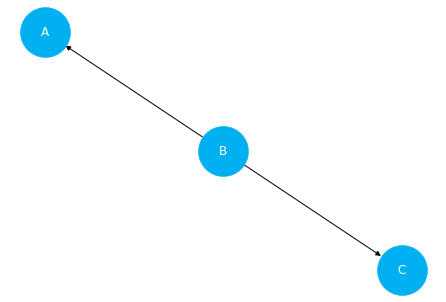

In [12]:
nx.draw(
    graph, 
    with_labels=True,
    node_size=2500,
    node_color=COLORS[0],
    font_color='white'  
)

Now, let's generate some **random data** that follows from **this structure**.

In [3]:
# Let's set random seed for reproducibility
np.random.seed(45)

# `b` represents our confounder
b = np.random.rand(100)

# `a` and `c` are causally independent of each other, but they are both children of `b` 
a = b + .1 * np.random.rand(100)
c = b + .3 * np.random.rand(100)

As you can see the only way that $A$ and $C$ have something in common is through their common cause $B$. Otherwise they are independent. 

## 2. Seeing the relationships

Now, let's see how the relationships between $A$, $B$ and $C$ look like on a scatter plot.

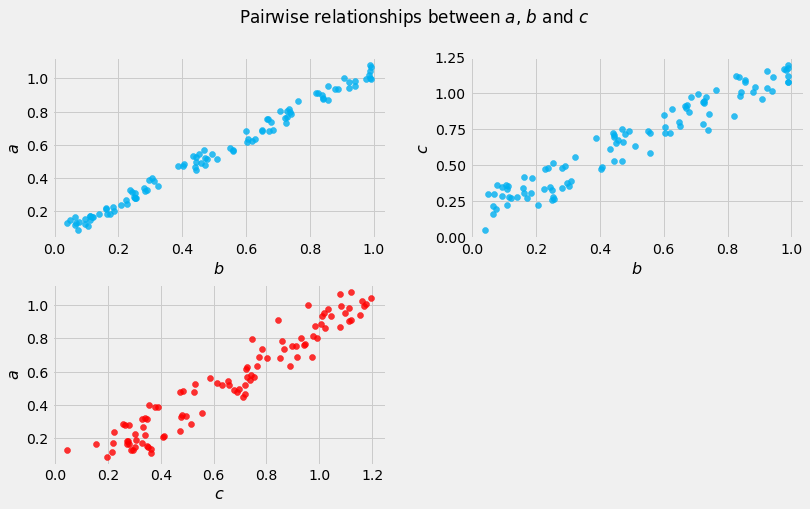

In [4]:
variables = {
    'a': a,
    'b': b,
    'c': c
}

plt.figure(figsize=(12, 7))

for i, (var_1, var_2) in enumerate([('b', 'a'), ('b', 'c'), ('c', 'a')]):
    
    color = COLORS[1]
    
    if 'b' in [var_1, var_2]:
        color = COLORS[0]
    
    plt.subplot(2, 2, i + 1)
    plt.scatter(variables[var_1], variables[var_2], alpha=.8, color=color)
    
    plt.xlabel(f'${var_1}$', fontsize=16)
    plt.ylabel(f'${var_2}$', fontsize=16)

plt.suptitle('Pairwise relationships between $a$, $b$ and $c$')
plt.subplots_adjust(hspace=.25, wspace=.25)
plt.show()

We marked the relationship between $A$ and $C$ in **red** as thew only non-causal realtionship in the plot. 

Note that $A$ did not cause $C$ nor *vice versa*, yet they look strongly related.

Let;s confirm this looking at their correltion coeffincient:

In [14]:
# Let's check correlation between `a` and `c`
coef, p_val = stats.pearsonr(a, c)

print(coef, p_val)

0.9627497625297509 1.8074604177505315e-57


The correlation coefficient is very high and $p$-value is very small indicating a **strong relationship** between the variables.

## 3. Confounding is a causal concept

This simple analysis shows us that **confounding** is **very difficult** to **define** is strictly **statistical terms**.

That's why we say that **confounding** is a strictly causal and not statistical concept.


You can still build an effective predictive model if your data is **confounded**. It will work very well until the distribution of critical variables (in our case $A$) changes. 

Then your model will not be able to make accurate predictions anymore.

## 4. De-confounding

To **de-confound** the relationship between $A$ and $C$ you need to include $B$ in your model. 

It sounds very simple, but in many real cases we are not aware which variables are **confounders** and sometimes we don;t even have these variables recorded in our dataset. When a confounding variables is not observed, we talk about **hidden confounding**.

**Hidden confounding** is one of the main challenges when it comes to applications of causal inference methods in practice.

### [Back to causalpython.io](https://causalpython.io)